In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [45]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [35]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
Measurement = Base.classes.measurement
Stations = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [39]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [40]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

climate_data = calc_temps('2017-01-01', '2017-12-31')[0]
climate_data

(58.0, 74.14387974230493, 87.0)

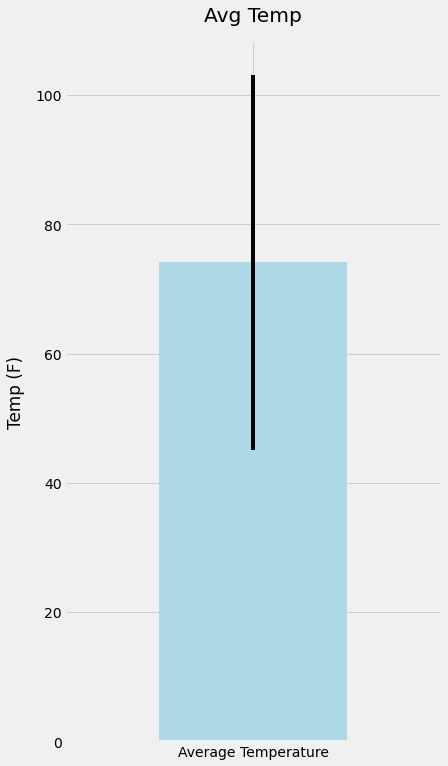

In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(num=None, figsize=(6,12))

plt.bar("Average Temperature", climate_data[1], yerr=(climate_data[0]-climate_data[2]), label='Average temperature', color="lightblue", width=1,) 
plt.xlim(-1, 1) 

plt.title("Avg Temp", fontsize='x-large', loc='center', pad=20)
plt.ylabel("Temp (F)", labelpad=10)

plt.savefig("Images/Avg_temp.png", transparent=False)

plt.show()

### Daily Rainfall Average

In [48]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

last_year_1 = '2016-08-01'
last_year_2 = '2016-08-07'

# Run query and sort in descending order by precipitation amount and list the station, 
# name, latitude, longitude, and elevation
query_1_2 = session.query(stations.id, stations.station, stations.latitude, 
                    stations.longitude, stations.elevation, func.sum(measurements.prcp)).\
                    filter(measurements.date >= last_year_1, measurements.date <= last_year_2).\
                    filter(measurements.station == stations.station).\
                    group_by(measurements.station).\
                    order_by(func.sum(measurements.prcp).desc()).statement
avg_rain = pd.read_sql_query(query_1_2, session.bind)

avg_rain.head()

NameError: name 'stations' is not defined

In [25]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
trip_start_date_dt_object = dt.strptime(trip_start_date, '%Y-%m-%d')
trip_end_date_dt_object = dt.strptime(trip_end_date, '%Y-%m-%d')

trip_date_range = trip_end_date_dt_object - trip_start_date_dt_object

# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session